# NK annotations by Pfefferle et al. 2019

Sample description:
- Easigenomics dataset
- Aplastic anemia
- follow up
- BM blasts = 0 %

### Reference:
Pfefferle, A., Netskar, H., Ask, E. H., Lorenz, S., Goodridge, J. P., Sohlberg, E., Clancy, T., & Malmberg, K.-J. (2019). A Temporal Transcriptional Map of Human Natural Killer Cell Differentiation. BioRxiv, 630657. https://doi.org/10.1101/630657

NK cells are traditionally divided based on CD56 expression into CD56bright and CD56dim sub-populations, which have distinct functional properties. CD56bright NK cells are considered as immature precursors of CD56dim  NK cells and have an immunoregulatory role, while CD56dim NK cells express CD16 and have more cytotoxic properties. CD56bright NK cells are the most immature, while adaptive NK cells are the most mature forms of NK cells. Canonical differentiation markers for NK cells were NCAM (CD56), KLRC2 (NKG2C), SELL (CD62L), CD7 and FCGR3A (CD16). In this paper, 5 clusters of NK cells were defined. Clearest difference was seen between clusters 2 and 3, which represents CD56bright to CD56dim transition. 

- Cluster 1: IFNG, OAS1, FGR, CDK6, CCR5 (CD195), SLC37A1, IL2RB(CD122), IL2RG(CD132), IL15RA(CD215), KLRD1(CD94), RUNX3 and IKZF2 

- Cluster 2:  XCL1, SELL(CD62L), CCR1(CD191), LEF1, IL7R(CD127), GZMK, LTB, CD27, CCR7(CD197), MYC, CAPG, KIT(CD117), IL23A and BACH2.

- Cluster 3: CCL3, CCL4, CCL5, RORA, GZMA, GZMB, GZMH, GZMM,FCGR3A(CD16), TIGIT (TIGIT), NFKBIA, CX3CR1, PRDM1, ZEB2, TFEB, CD38

- Cluster 4 and 5: The comparison between cluster 4 and 5 is representative of the transition from conventional to adaptive NK cells and was characterized by a general loss of gene expression.

- Differences between clusters 3 and 4 only minor. Separation of clusters 3 and 4: Upreg in cluster 3:  CD38, LAIR2(CD306), GNAQ, RETSAT, CCDC41, BTRC and NARS2. ALKBH2 upregulated in cluster 4. Cluster 3 represents a slightly more activated cell state within the conventional CD56dim NK cell compartment with higher expression of cytokine receptors (CD38, SIGLEC7, KLRB1, and TBX21) rather than being a unique differentiation stage 

Cluster 1: CD195, CD122, CD132, CD215, CD94
Cluster 2: CD62L, CD191, CD127, CD27, CD197, CD117, TIGIT
Cluster 3: CD16, CD38

Transition from CD56bright to CD56dim = CD96, TIGIT, CD155, CD226, CD161

Two CD56bright populations found in pseudotime analysis, population 1 high: KLRB1 (CD161) KLRD1 (CD94), NCAM1 (CD56), CD7, IL15RA (CD215), IL2RB (CD122), IL2RG (CD132), RUNX3 and IKZF2 (Ikaros) expression 

CD56bright differentiate into:
- NKG2A(CD94)+, KIR−, CD56dim
- NKG2A(CD94)−, KIR+, CD56dim 
- NKG2A(CD94)−,  KIR+, NKG2C(CD159c)+, CD56dim (adaptive)


NK cell markers (by Mustjoki group):

- is_nk = ["CD3E", "KLRB1", "KLRD1", "GZMB", "NCAM1"]
- nk_cd56_bright = ["NCAM1", "KLRC1", "MYC", "BACH2"]
- nk_cd56_dim = ["FCERG3A", "PRDM1", "ZEB2", "MAF"]
- nk_adaptive= ["KLRC2", "KLF2"]

nk_immature = ['CD56']
nk_activating= ['CD335', 'CD314', 'CD2', 'CD226']
nk_maturation= ['CD57']

nk_inhibitory= ['CD158A', 'CD158B2', 'CD158E1'] the markers not found in Neurips data




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as ad
import scvi
import scanpy as sc
import umap

from ridgeplot import ridgeplot

import warnings

warnings.filterwarnings('ignore')


Global seed set to 0
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:53: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  new_rank_zero_deprecation(
/Users/tiinatuononen/opt/anaconda3/envs/tiina-env/lib/python3.10/site-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [2]:
#all datasets
adata = sc.read_h5ad('/Users/tiinatuononen/Desktop/Thesis/Project/data/adata_easi_norm.h5ad')


In [3]:
#select sample

adata=adata[adata.obs['eg_code'] == 'EG36']

In [4]:
adata1=adata[adata.obs['cell_type'] == 'NKT']

In [5]:
adata1

View of AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [6]:
adata1

View of AnnData object with n_obs × n_vars = 1585 × 8051
    obs: 'cell_type', 'n_genes', 'percent_mito', 'percent_ribo', 'n_counts', 'leiden_r2', 'leiden_r2_n_genes_MAD_diff', 'leiden_r2_n_counts_MAD_diff', 'leiden_r2_percent_mito_MAD_diff', 'filter', 'model_group', 'BATCH', 'POOL', 'SAMPLE_SET', 'SAMPLE_TYPE', 'SAMPLE_TISSUE', 'DIAGNOSIS', 'SUBTYPE', 'STATUS', 'eg_code', 'leiden_r1', 'new_cell_type', 'batch_group'
    uns: 'neighbors', 'new_cell_type_colors', 'umap'
    obsm: 'X_pca', 'X_totalVI', 'X_umap', 'protein_expression', 'protein_expression_clr', 'protein_expression_dsb'
    obsp: 'connectivities', 'distances'

In [7]:
adata1.var_names

Index(['FAM41C', 'NOC2L', 'ISG15', 'C1orf159', 'SDF4', 'B3GALT6', 'UBE2J2',
       'ACAP3', 'PUSL1', 'AURKAIP1',
       ...
       'IKBKG', 'GAB3', 'DKC1', 'MPP1', 'F8A1', 'FUNDC2', 'BRCC3', 'VBP1',
       'TMLHE', 'VAMP7'],
      dtype='object', length=8051)

## NK cell markers

In [8]:
#NK cell markers (Reference 1)

nk_immature = ['CD56']
nk_activating= ['CD335', 'CD314', 'CD2', 'CD226']
nk_maturation= ['CD57']
# nk_inhibitory= ['CD158A', 'CD158B2', 'CD158E1'] these markers not found in Neurips data

nk_mustjoki = [nk_immature, nk_activating, nk_maturation]
nk_mustjoki = list(np.concatenate(nk_mustjoki).flat)

In [ ]:
#NK cell markers (Reference 2) used in Neurips antibody panel

nk_immature_pfef = ['CD56']
nk56dim = ['CD94','CD158b', 'CD57']

# nk_adaptive =['CD158b', 'CD159c, CD57'] CD159c not used in Neurips, so this is same as previous

nk_transition= ['TIGIT', 'CD155', 'CD226', 'CD161'] 

c1_pfef = ['CD195', 'CD122', 'CD94']
c2_pfef = ['CD62L', 'CD127', 'CD27', 'TIGIT']
c3_pfef = ['CD16', 'CD38']

pseudotime= ['CD161', 'CD94', 'CD56', 'CD5', 'CD7', 'CD122']

In [9]:
listOfGenes= is_nk

is_nk=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        is_nk.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

CD3E Yes
KLRB1 No
KLRD1 No
GZMB Yes
NCAM1 No
['CD3E', 'KLRB1', 'KLRD1', 'GZMB', 'NCAM1']


In [10]:
listOfGenes=nk_cd56_bright

nk_cd56_bright=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_cd56_bright.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

NCAM1 No
KLRC1 No
MYC Yes
BACH2 Yes
['NCAM1', 'KLRC1', 'MYC', 'BACH2']


In [11]:
listOfGenes=nk_cd56_dim

nk_cd56_dim=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_cd56_dim.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

FCERG3A No
PRDM1 Yes
ZEB2 Yes
MAF No
['FCERG3A', 'PRDM1', 'ZEB2', 'MAF']


In [12]:
listOfGenes=nk_adaptive
nk_adaptive=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        nk_adaptive.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

KLRC2 No
KLF2 Yes
['KLRC2', 'KLF2']


In [13]:
listOfGenes=canonical_markers
canonical_markers=[]

for x in listOfGenes:
    if x in adata1.var_names:
        print(x, "Yes")
        canonical_markers.append(x)
    else:
        print(x, "No") 
        
print(listOfGenes)

NCAM1 No
NKG2C No
SELL Yes
CD7 No
FCGR3A No
['NCAM1', 'NKG2C', 'SELL', 'CD7', 'FCGR3A']


In [14]:
#list of lists into a one list

pfefferle_markers=[is_nk, nk_cd56_bright, nk_cd56_dim, nk_adaptive]
pfefferle_markers = list(np.concatenate(pfefferle_markers).flat)

## UMAPs

In [16]:
sc.settings.set_figure_params(dpi=150)

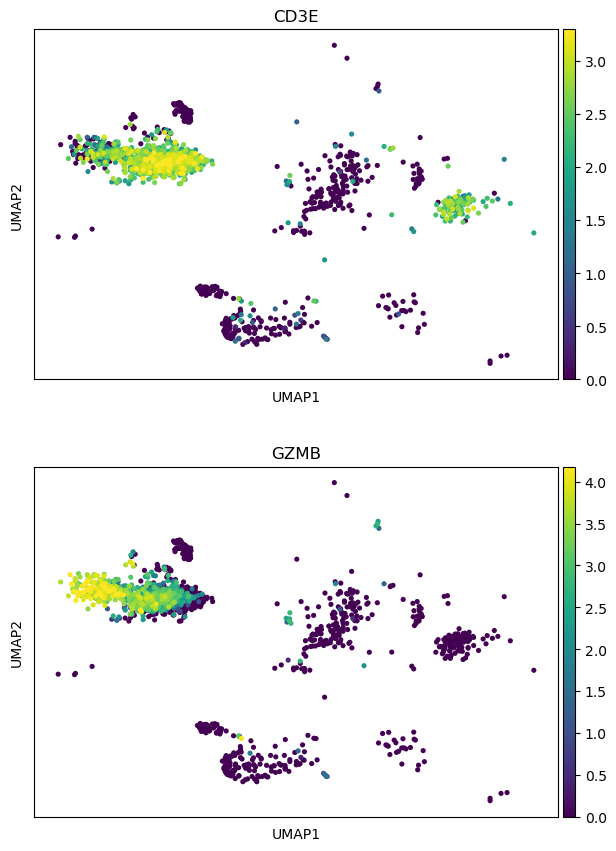

In [19]:
#all cell types

sc.pl.umap(adata, color = is_nk, color_map = 'viridis', vmax="p99", ncols = 1)

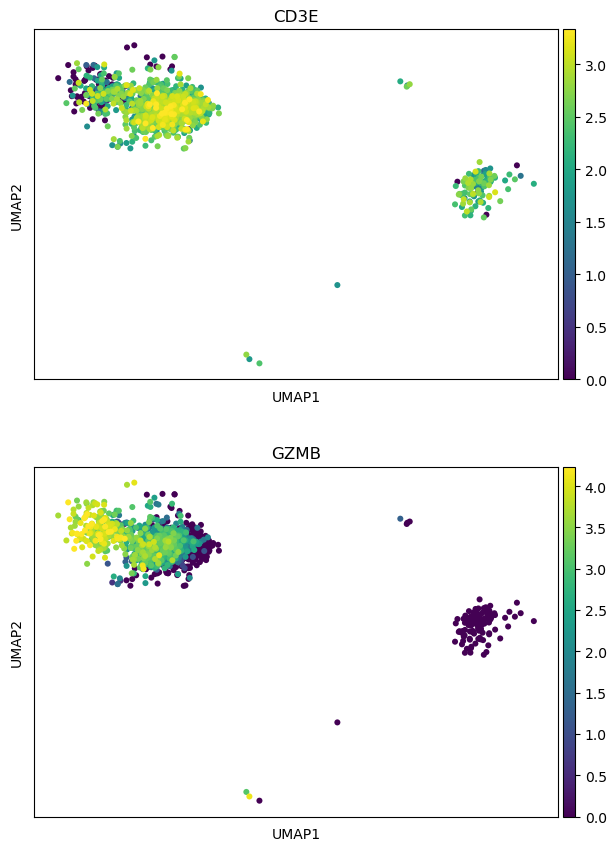

In [15]:
#Only NKT

sc.pl.umap(adata1, color = is_nk, color_map = 'viridis', vmax="p99", ncols = 1)

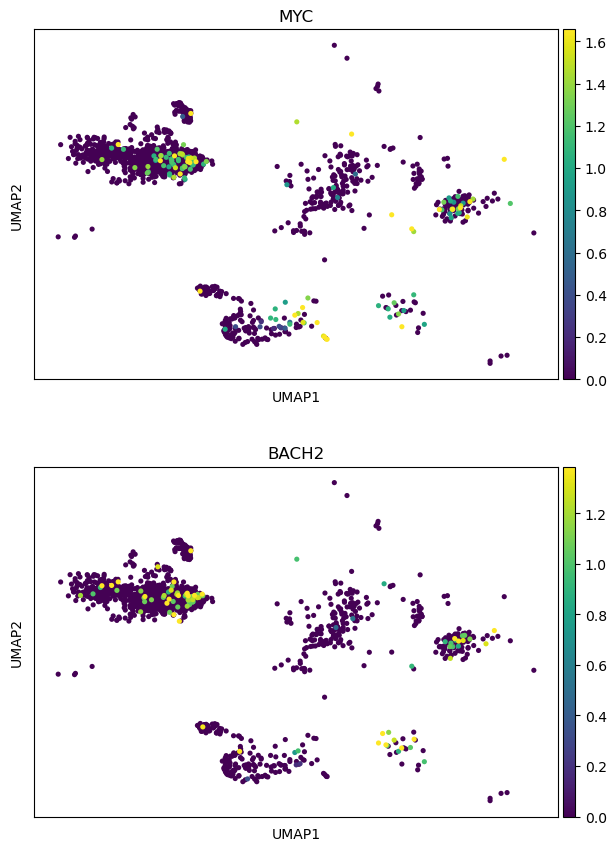

In [20]:
#all cell types
sc.pl.umap(adata, color = nk_cd56_bright, color_map = 'viridis',vmax="p99", ncols = 1)

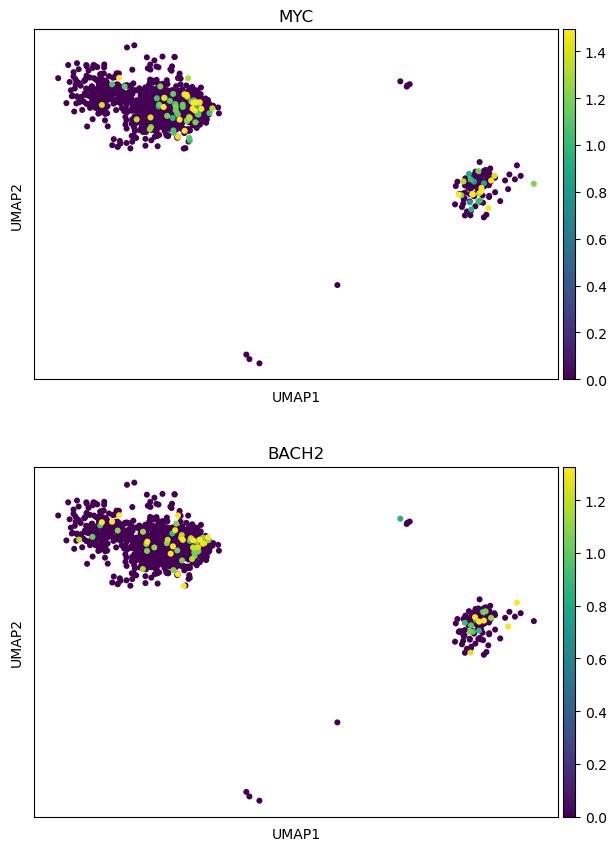

In [16]:
#Only NKT

sc.pl.umap(adata1, color = nk_cd56_bright, color_map = 'viridis',vmax="p99", ncols = 1)

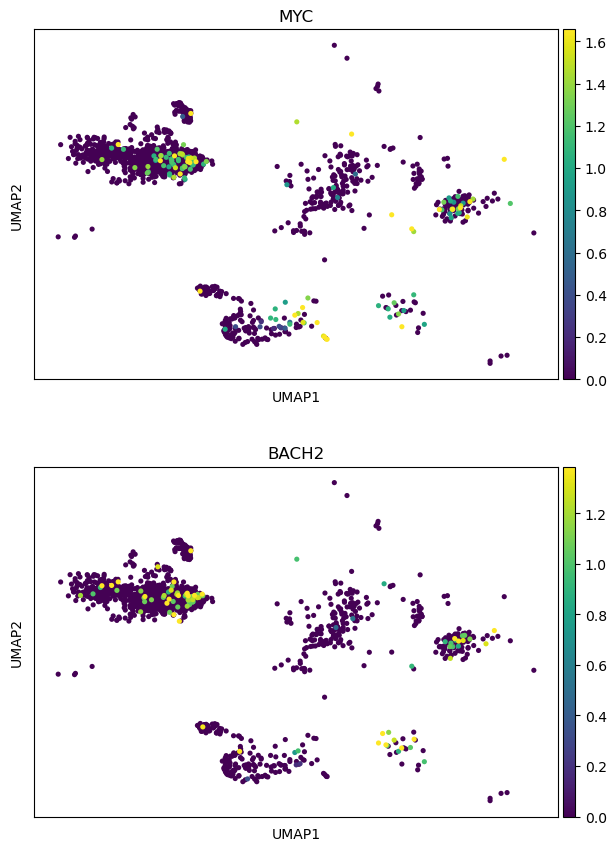

In [24]:
#all cell types

sc.pl.umap(adata, color = nk_cd56_bright, color_map = 'viridis',vmax="p99", ncols = 1)

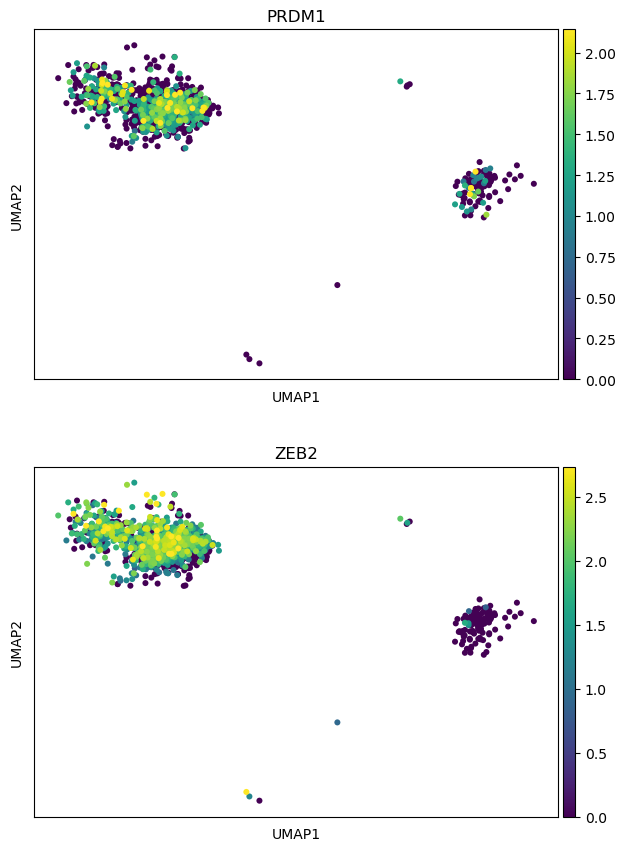

In [17]:
#only NKT

sc.pl.umap(adata1, color = nk_cd56_dim, color_map = 'viridis', vmax="p99", ncols = 1)

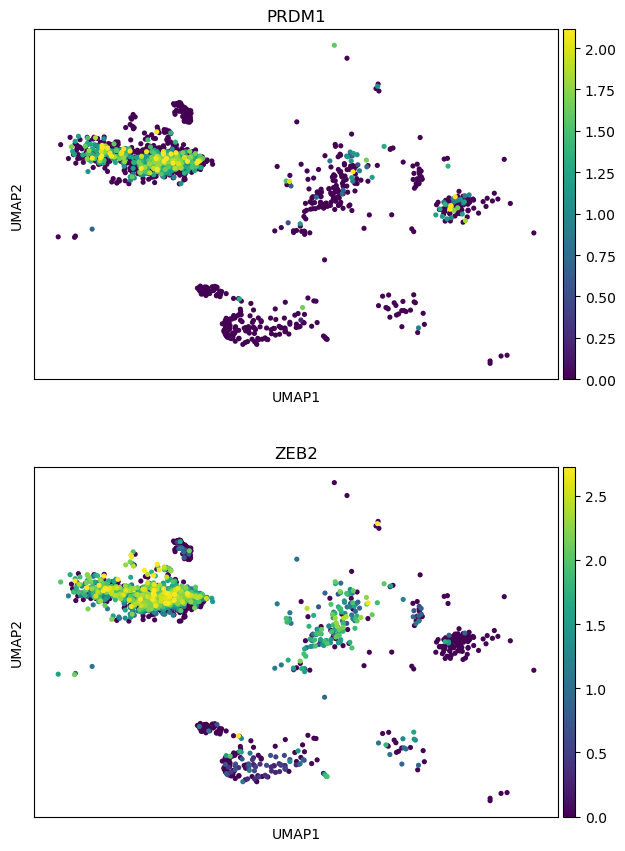

In [23]:
#All cell types

sc.pl.umap(adata, color = nk_cd56_dim, color_map = 'viridis',vmax="p99", ncols = 1)

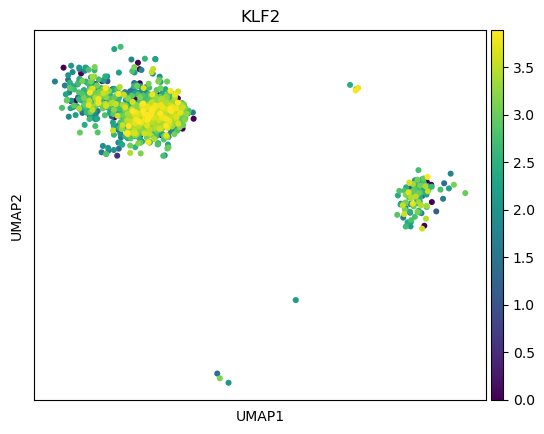

In [22]:
#Only NKT

sc.pl.umap(adata1, color = nk_adaptive, color_map = 'viridis', vmax="p99", ncols = 1)

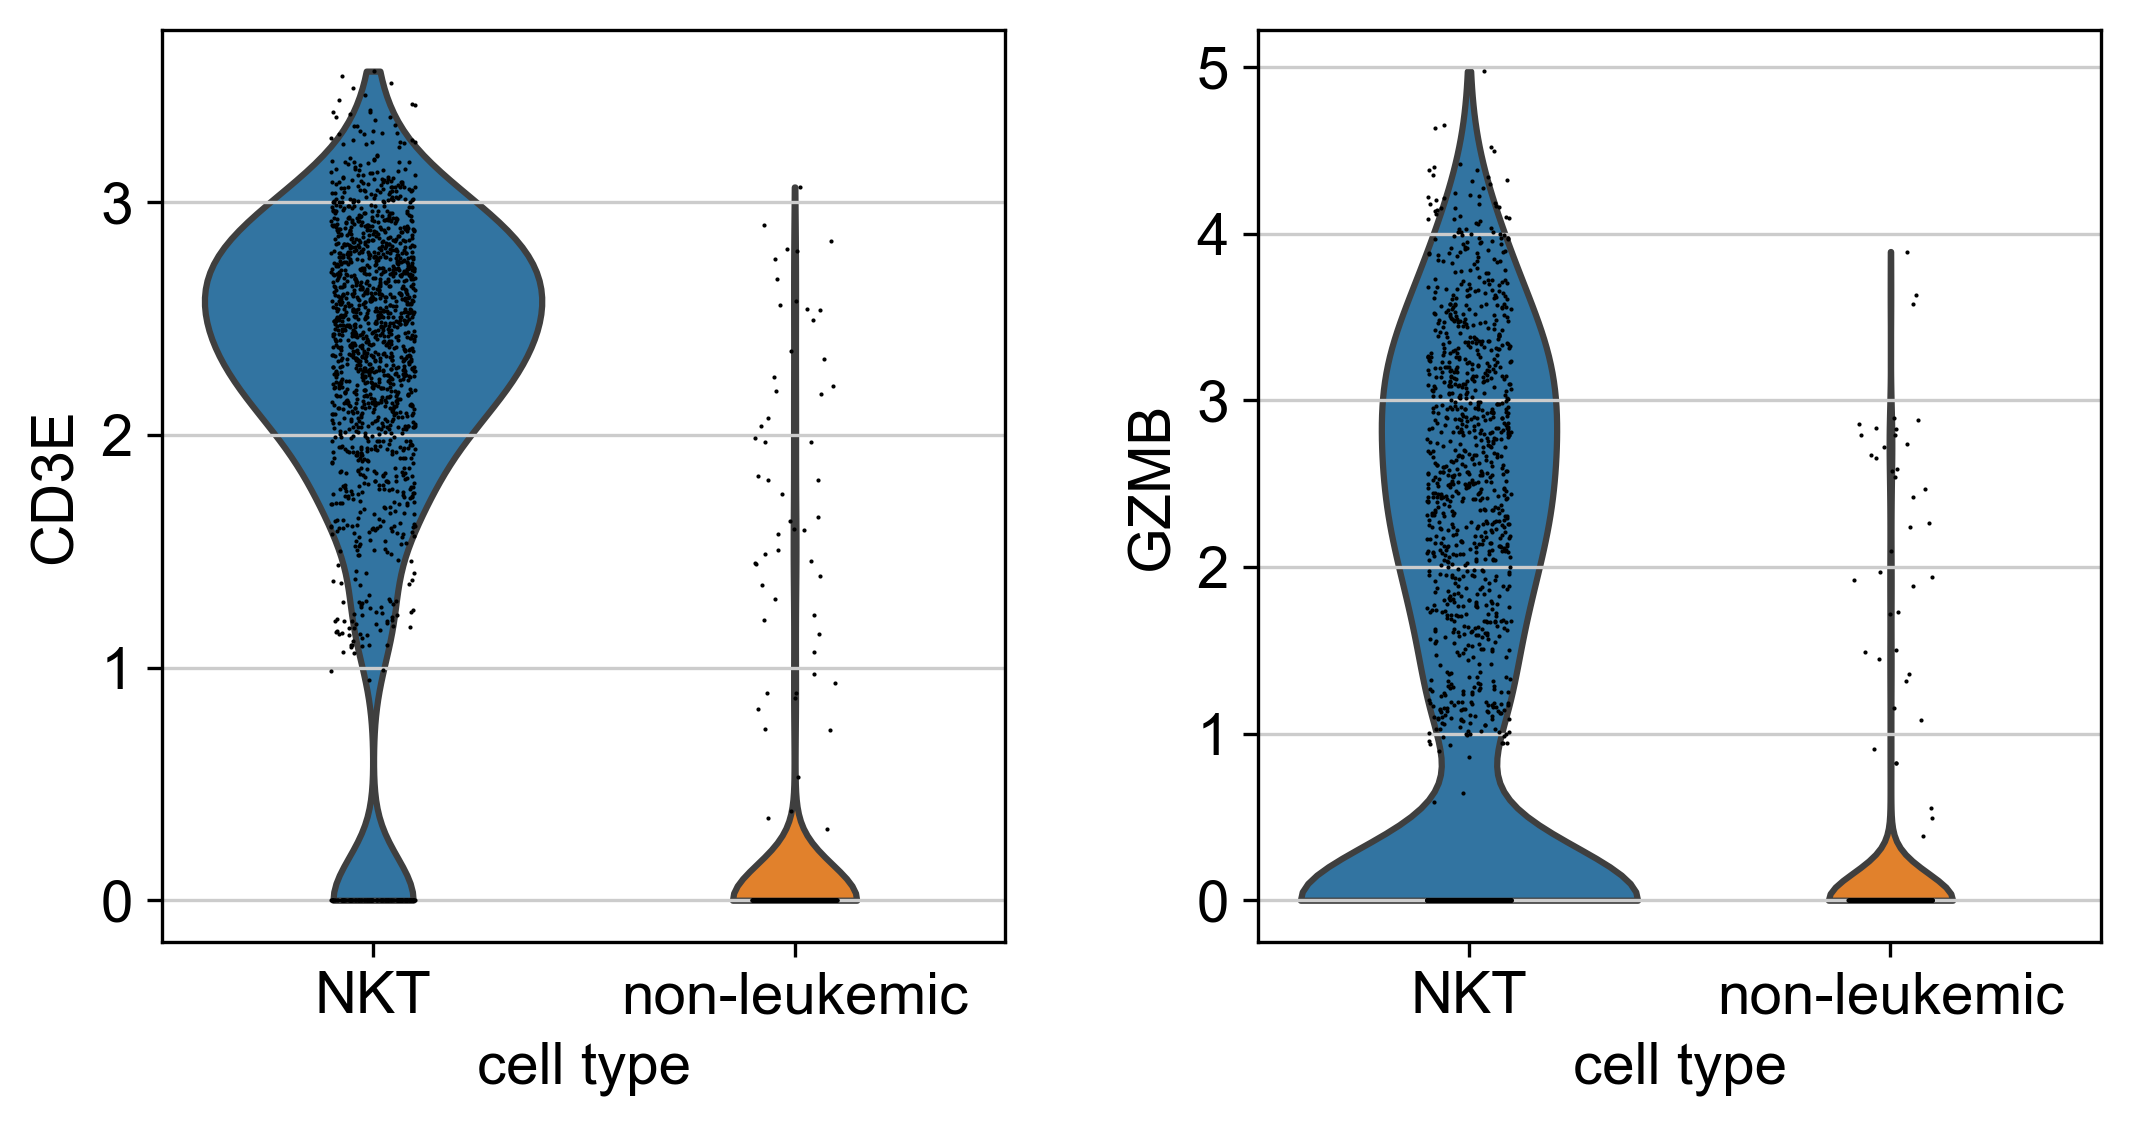

In [21]:
sc.pl.violin(adata, keys= is_nk, groupby= 'cell_type', scale = 'count')


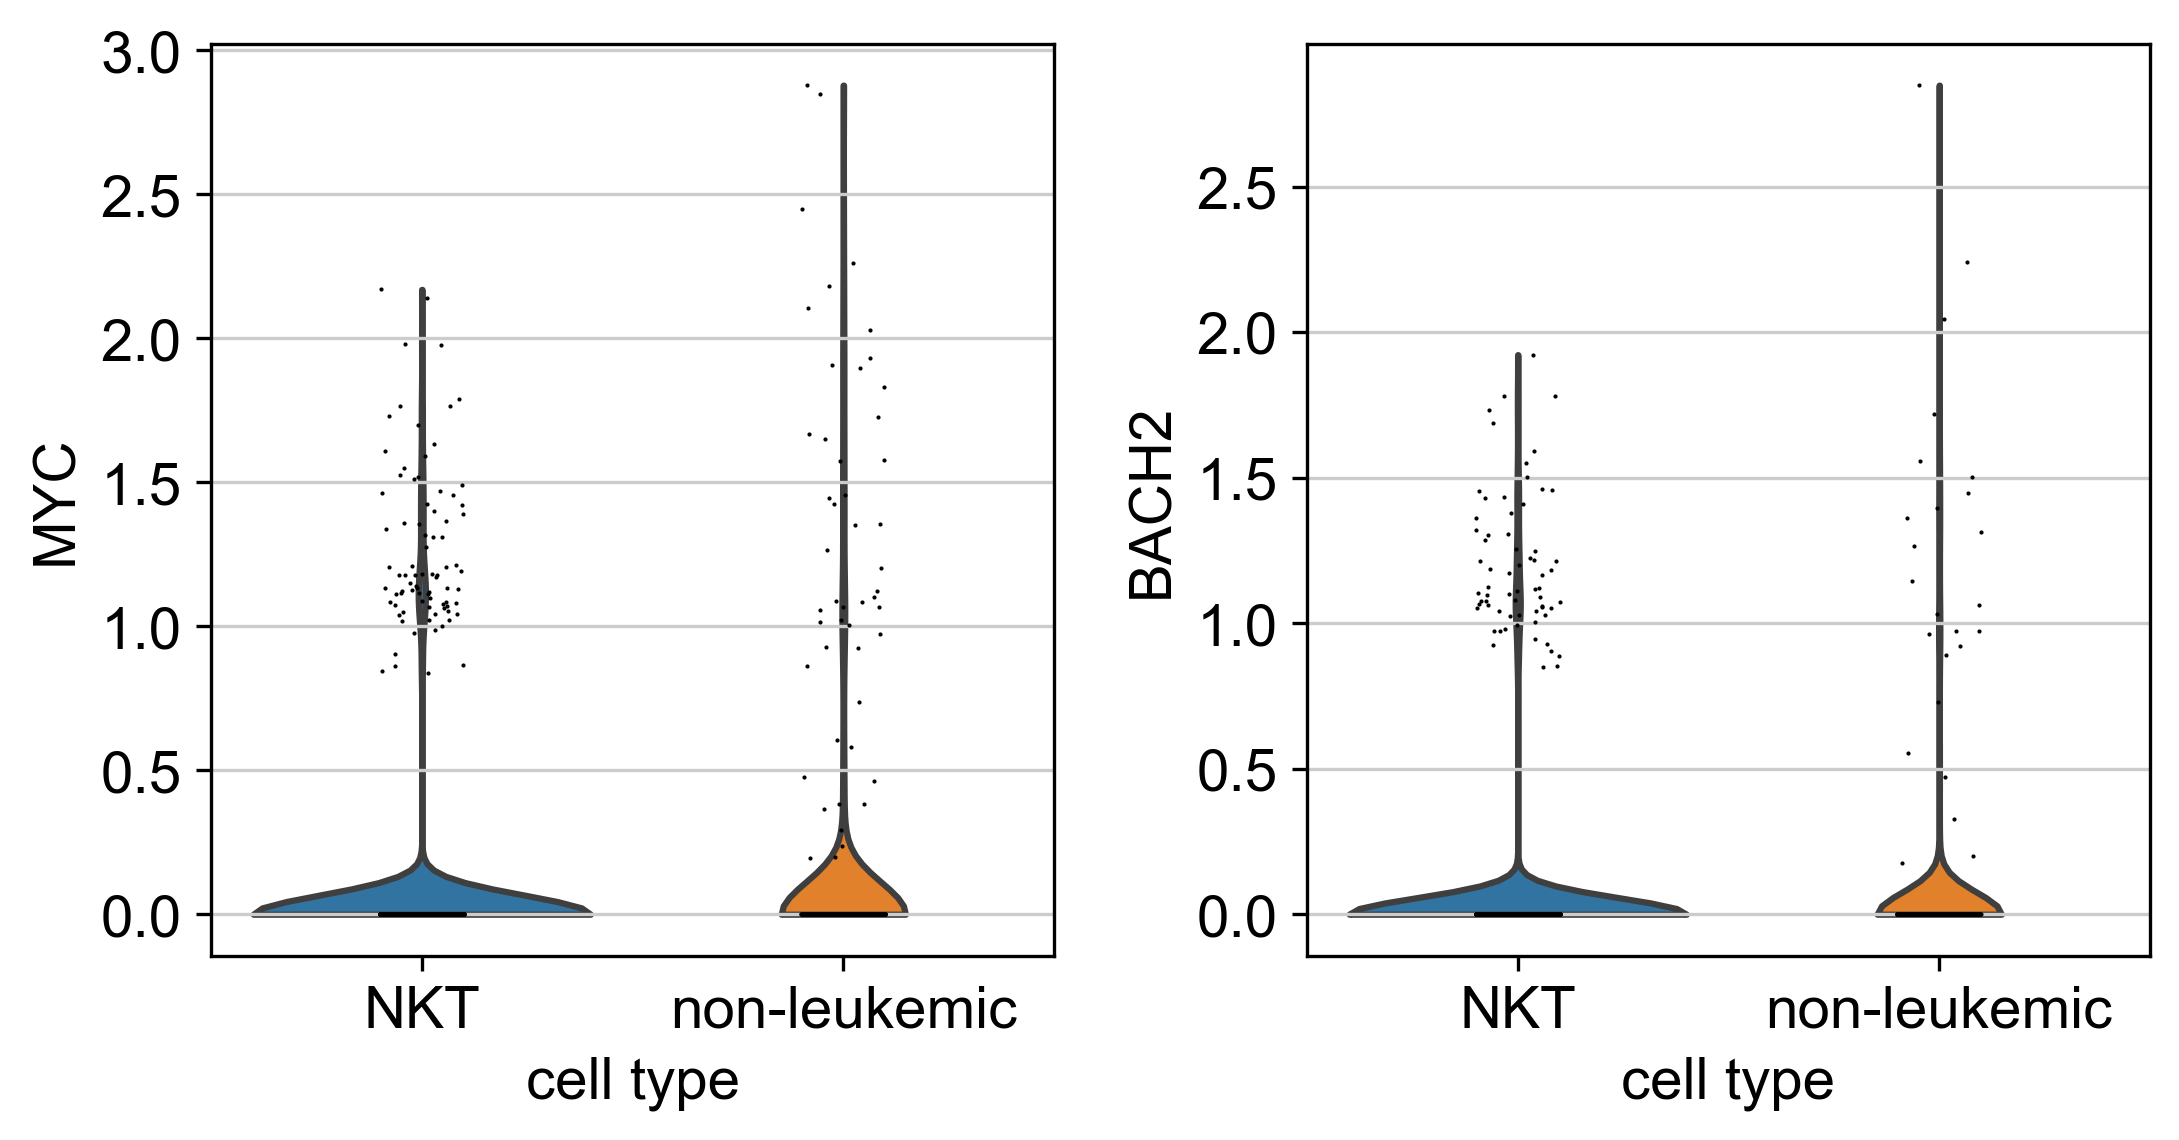

In [22]:
sc.pl.violin(adata, keys= nk_cd56_bright, groupby= 'cell_type', scale = 'count')


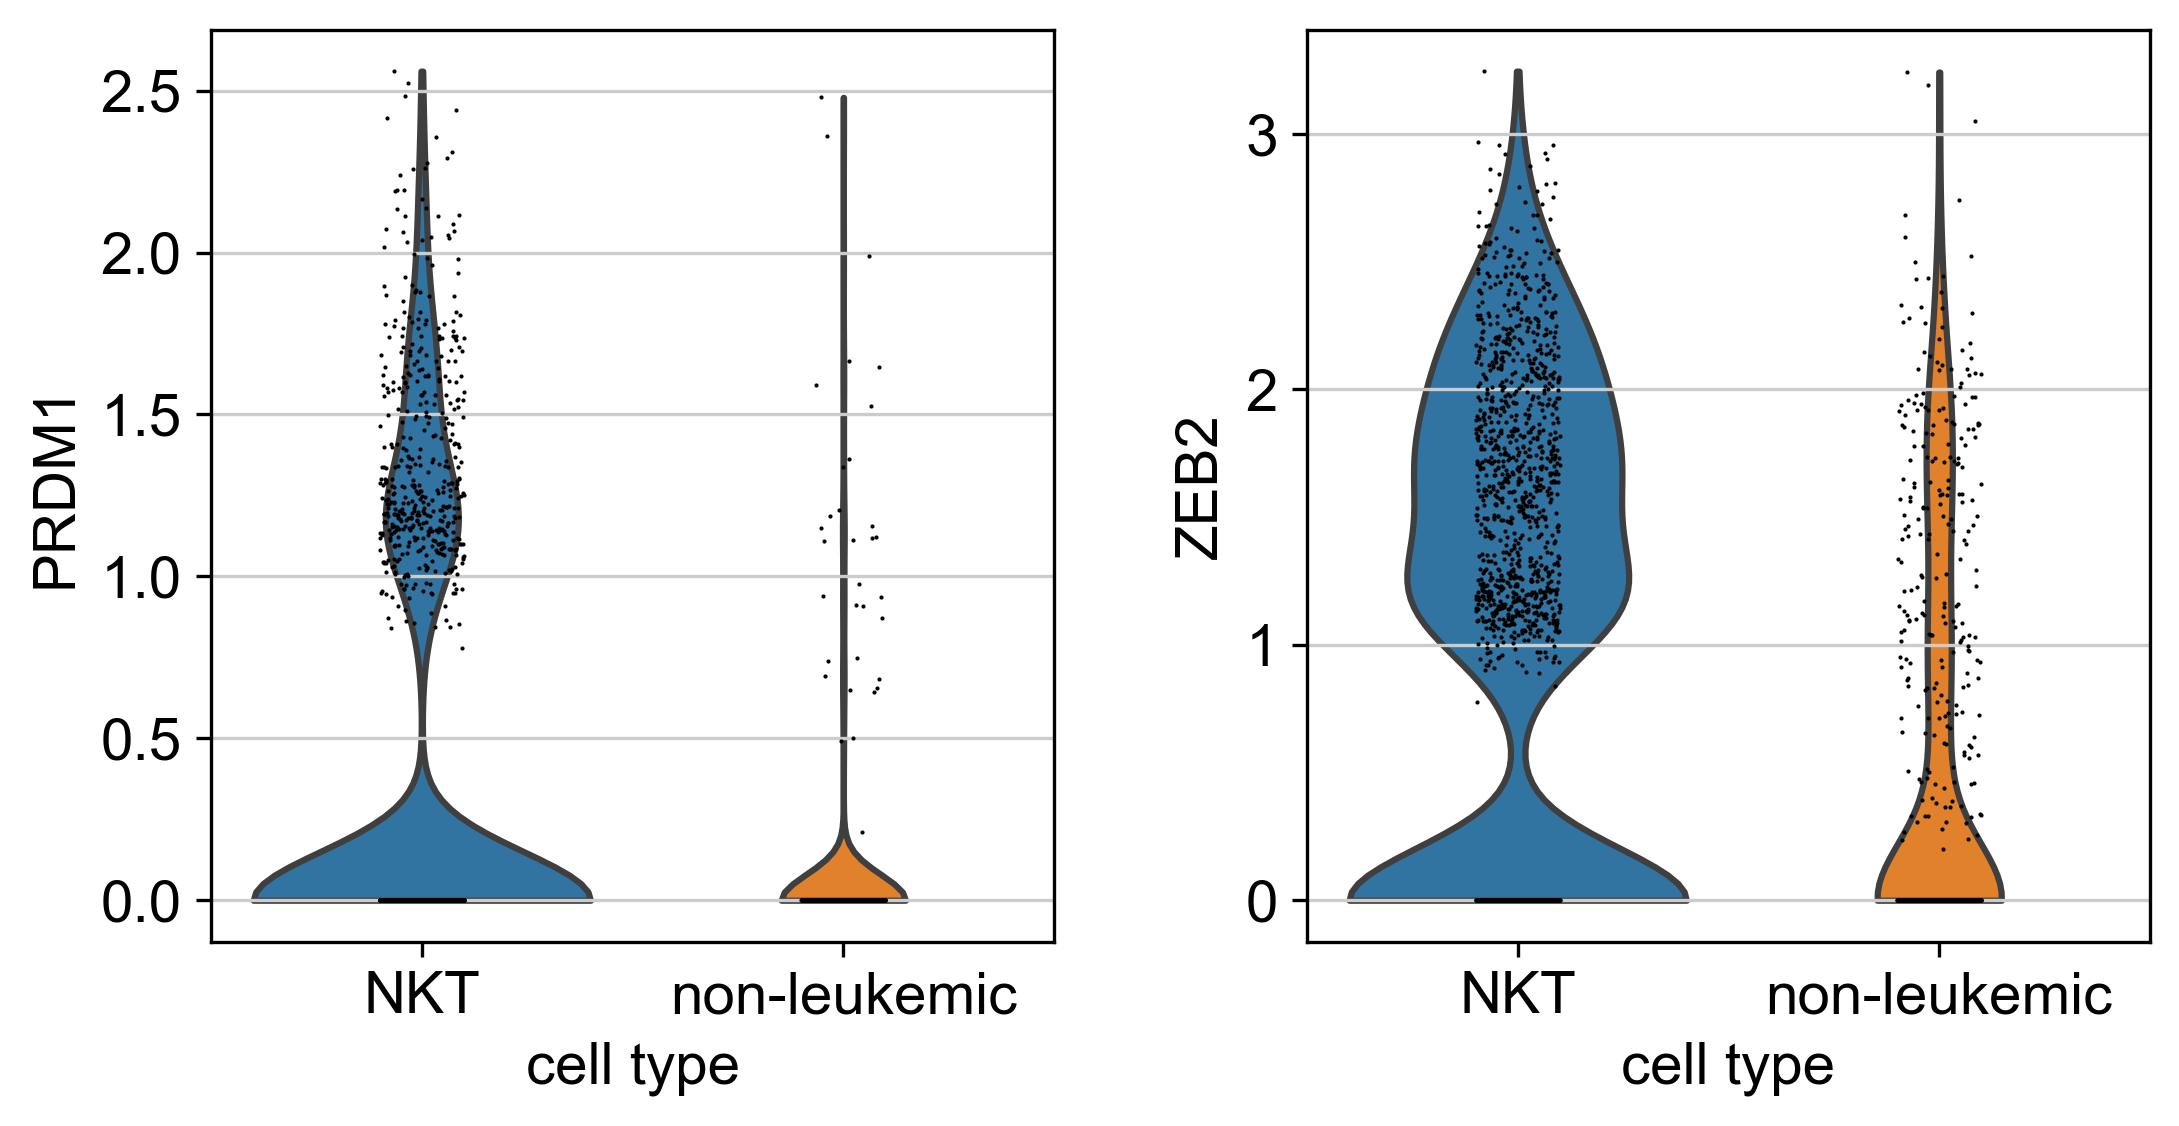

In [23]:
sc.pl.violin(adata, keys= nk_cd56_dim, groupby= 'cell_type', scale = 'count')



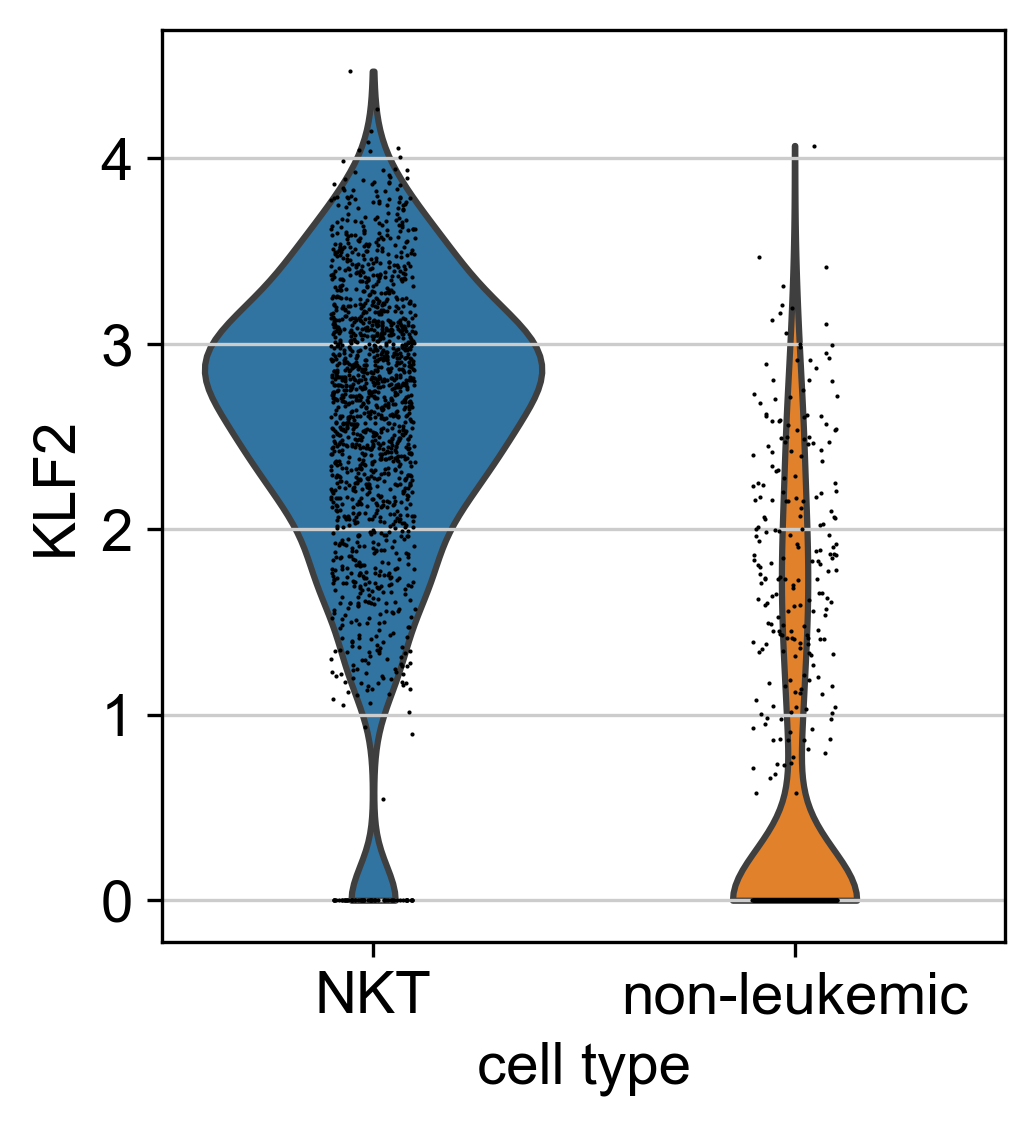

In [24]:
sc.pl.violin(adata, keys= nk_adaptive, groupby= 'cell_type', scale = 'count')

